In [1]:
# Import necessary packages
import numpy as np
import pandas as pd
import tensorflow as tf
import scipy as scp
import matplotlib.pyplot as plt
import os
import dnnregressor_predictor as dnn_pred
import dnnregressor_model_and_input_fn as dnn_model_input
import make_data_wfpt as mdw
import seaborn as sns

In [2]:
hyper_params = pd.read_csv('/Users/admin/OneDrive/git_repos/nn_likelihoods/tensorflow_models/dnnregressor_mse_from_simulation_mix_fixparams_v_1_a_2_w_5_08_15_18_12_11_54/dnn_training_results_mse_from_simulation_mix_fixparams_v_1_a_2_w_5_08_15_18_12_11_54.csv',
                          converters = {'hidden_units':eval,
                                        'activations':eval})

model_params = hyper_params.to_dict(orient = 'list')
for key in model_params.keys():
    model_params[key] = model_params[key][0]

In [5]:
# Generate a dataset (choice_probabilities)
dataset,_, __ = mdw.make_data_rt_choice(v_range = [1, 1], # uniform [0.6, 0.6]
                                        a_range = [2, 2], # unifor
                                        w_range = [0.5, 0.5],  # uniform
                                        n_samples = 10000,
                                        mixture_p = 0.1,
                                        method = 'sim',
                                        write_to_file = False)

datapoint 0 generated
datapoint 1000 generated
datapoint 2000 generated
datapoint 3000 generated
datapoint 4000 generated
datapoint 5000 generated
datapoint 6000 generated
datapoint 7000 generated
datapoint 8000 generated
datapoint 9000 generated
label 0 generated
label 1000 generated
label 2000 generated
label 3000 generated
label 4000 generated
label 5000 generated
label 6000 generated
label 7000 generated
label 8000 generated
label 9000 generated


In [7]:
# Make dataset feedable to tensorflow (wfpt)
features, labels, __, ___ = mdw.train_test_split_rt_choice(data = dataset,
                                                           p_train = 1,
                                                           write_to_file = False,
                                                           from_file = False)

In [8]:
# Make feature columns (wfpt)
feature_columns = dnn_model_input.make_feature_columns_numeric(features = features)
model_params['feature_columns'] = feature_columns

In [9]:
# Reinstantiate model
my_predictor = dnn_pred.get_dnnreg_predictor(model_directory = '/Users/admin/OneDrive/git_repos/nn_likelihoods/tensorflow_models/dnnregressor_mse_from_simulation_mix_fixparams_v_1_a_2_w_5_08_15_18_12_11_54/',
                                             params = model_params)

In [10]:
# Get Predictions (wfpt)
my_checkpoint = 'model.ckpt-800000'
my_predictions = dnn_pred.get_predictions(regressor = my_predictor,
                                         features = features,
                                         labels = labels,
                                         checkpoint = "/Users/admin/OneDrive/git_repos/nn_likelihoods/tensorflow_models/dnnregressor_mse_from_simulation_mix_fixparams_v_1_a_2_w_5_08_15_18_12_11_54/" + my_checkpoint)


In [11]:
# concatenate predictions with dataset
new_col = pd.DataFrame(my_predictions, columns = ['pred_likelihood'])
data_pred = pd.concat([dataset, new_col], axis = 1)

In [17]:
# Prepare for plotting
data_pred.sort_values('rt', axis=0, ascending=True, inplace=True, kind='quicksort', na_position='last')
data_pred_long = data_pred.melt(id_vars = ['rt', 'choice'], value_vars = ['nf_likelihood', 
                                              'pred_likelihood'], 
                                               var_name = 'group', 
                                               value_name = 'likelihood')

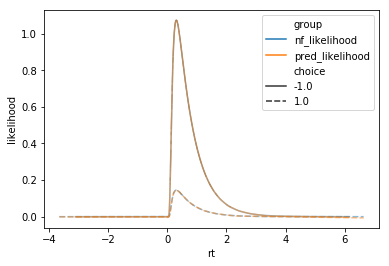

In [18]:
# Plot
ax = sns.lineplot(x = "rt", 
                  y = "likelihood", 
                  data = data_pred_long, 
                  hue = 'group',
                  style = 'choice',
                  alpha = 0.5)


# g.add_legend(title="Meal")
# g.set_axis_labels("Total bill ($)", "")
# g.set(xlim=(0, 60), yticklabels=["Thursday", "Friday", "Saturday", "Sunday"])
# g.despine(trim=True)
# g.fig.set_size_inches(6.5, 3.5)
# g.ax.set_xticks([5, 15, 25, 35, 45, 55], minor=True);
# plt.setp(g.ax.get_yticklabels(), rotation=30);